<a href="https://colab.research.google.com/github/AsthaGore/Credit-Card-Fraud-Detection/blob/main/CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
credit_card_data = pd.read_csv("/content/creditCrad_data.zip")

In [3]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Dataset has only numerical features from PCA (V1–V28), so original features are not available.
'Time' = seconds since first transaction.
'Amount' = transaction amount (can help with cost-sensitive learning).
'Class' = target; 1 = fraud, 0 = not fraud.


Preview the last few rows of the dataset

In [4]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
print("Dataset Shape (Rows, Columns):",credit_card_data.shape)

Dataset Shape (Rows, Columns): (284807, 31)


In [6]:
print("\nDataset Information:\n")
print(credit_card_data.info())


Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  

Data Visualization

In [7]:
import matplotlib.pyplot as plt

In [8]:
legit = credit_card_data[credit_card_data.Class==0]
fraud = credit_card_data[credit_card_data.Class ==1]

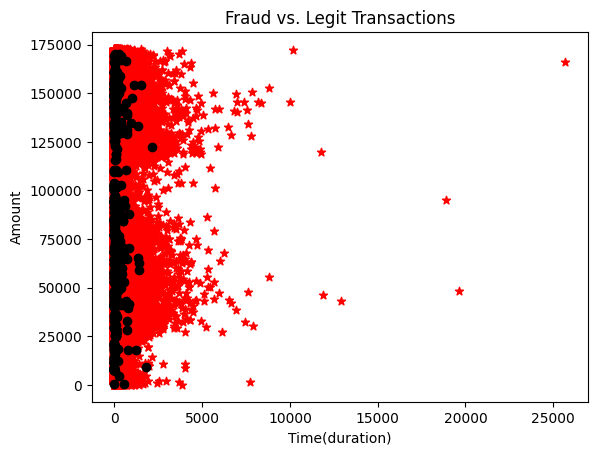

In [9]:
plt.title("Fraud vs. Legit Transactions")
plt.xlabel("Time(duration)")
plt.ylabel("Amount")
plt.scatter(legit.Amount,legit.Time,label = "legal",color = 'Red',marker = "*")
plt.scatter(fraud.Amount,fraud.Time,label="fraud",color='black',marker="o")

plt.show()

In [10]:
print("\nMissing Values in Each Column:\n")
print(credit_card_data.isnull().sum())


Missing Values in Each Column:

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [11]:
# Distribution of legit transctions and fraudulent transctions
print("\nClass Distribution:")
print(credit_card_data['Class'].value_counts())


Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64


0 --> Legal transaction 1 --> fraudulent transaction

Data modification

In [12]:
# Separting the data for Analysis
legit = credit_card_data[credit_card_data.Class==0]
fraud = credit_card_data[credit_card_data.Class==1]

In [13]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


Statistical Measure of data

In [15]:
print('Details of legit transaction')
legit.Amount.describe()

Details of legit transaction


,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [14]:
print('Amount details of the fraudulent transaction')
fraud.Amount.describe()

Amount details of the fraudulent transaction


,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


Compare the values of both transactions

In [17]:
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [18]:
#Pandas dataframe.groupby() function is used to split the data
# into groups based on some criteria.

Build a sample dataset containing similar distribution of normal transactions and fraudulent transactions

In [19]:
legit_sample = legit.sample(n=492)

In [20]:
# Conactentaing the two dataframes
new_dataset = pd.concat([legit_sample,fraud] ,axis = 0)
# axis = 0 - means values are added row wise
# all 492 values are added below this legit sample
# axis = 1 - means values are added colum wise

In [21]:
new_dataset = pd.concat([legit_sample,fraud] ,axis = 0)

In [22]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
163042,115594.0,-0.866975,0.471477,2.181120,-0.503965,-0.113785,0.331324,-0.070530,0.401437,0.672804,...,0.021803,0.119110,-0.255798,0.562400,0.399541,-0.210327,0.323046,0.147443,19.36,0
230184,146226.0,2.255889,-1.505012,-0.808560,-1.668634,-1.308710,-0.195650,-1.432749,0.093177,-1.171014,...,-0.124897,0.060801,0.310999,0.647424,-0.323789,-0.222878,0.008770,-0.054068,7.15,0
197078,131833.0,2.068638,-0.291770,-1.544230,0.123194,0.278276,-0.197976,-0.102212,0.056902,0.673618,...,-0.264658,-0.761488,0.268635,0.148421,-0.206198,0.263070,-0.096471,-0.076740,1.18,0
254714,156874.0,1.793850,-0.742100,-0.469229,0.386090,-0.651875,-0.086176,-0.550967,0.027907,0.890914,...,0.288914,0.852193,-0.008289,-0.248368,-0.223049,0.601734,-0.040311,-0.044840,102.03,0
221071,142421.0,0.138652,0.315120,1.135754,-0.464239,-0.185422,-0.204253,0.095162,0.110974,0.539018,...,0.256238,0.861206,0.020502,1.141550,-0.531308,0.441737,0.020328,0.015978,11.50,0


In [23]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


Building the model

In [24]:
new_dataset['Class'].value_counts()

,count
Class,
0,492
1,492


In [25]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95066.634146,0.087531,-0.055066,-0.026714,-0.011133,-0.035228,0.078047,-0.047242,0.045215,0.058374,...,-0.034431,-0.026203,-0.015483,0.007871,0.003197,0.056676,-0.004462,-0.001122,0.001121,79.432947
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Spliting the data into features and target

In [26]:
x = new_dataset.drop(columns = 'Class',axis = 1)

In [27]:
y = new_dataset['Class']

In [28]:
print(x)

            Time        V1        V2        V3        V4        V5        V6  \
163042  115594.0 -0.866975  0.471477  2.181120 -0.503965 -0.113785  0.331324   
230184  146226.0  2.255889 -1.505012 -0.808560 -1.668634 -1.308710 -0.195650   
197078  131833.0  2.068638 -0.291770 -1.544230  0.123194  0.278276 -0.197976   
254714  156874.0  1.793850 -0.742100 -0.469229  0.386090 -0.651875 -0.086176   
221071  142421.0  0.138652  0.315120  1.135754 -0.464239 -0.185422 -0.204253   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

Split the data into training data and testing data

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,stratify=y ,random_state=2)
#stratify=Y: strafied the data based on Y
#random_state=2 : means how you want to split your data

Feature Scaling

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [32]:
# Logistic Regression - For binary classification problem
print(x.shape,x_train.shape,x_test.shape)
#x.shape = actual dataset
# x_train and X_test====>> data splitted sample count print

(984, 30) (787, 30) (197, 30)


#Logistic Regression

Model training Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [34]:
#Training the regression model with training data
model.fit(x_train,y_train)

LogisticRegression()

In [35]:
y_pred = model.predict(x_test)

Predict probability of each test sample belonging to a particular class

In [36]:
model.predict_proba(x_test)

array([[1.07978109e-03, 9.98920219e-01],
       [9.85390282e-01, 1.46097183e-02],
       [9.50586068e-01, 4.94139325e-02],
       [9.98917816e-01, 1.08218376e-03],
       [2.14055594e-05, 9.99978594e-01],
       [9.52872831e-01, 4.71271691e-02],
       [5.93339404e-03, 9.94066606e-01],
       [5.32984767e-11, 1.00000000e+00],
       [9.71820831e-01, 2.81791692e-02],
       [6.40666409e-10, 9.99999999e-01],
       [9.85670377e-01, 1.43296229e-02],
       [1.47183717e-05, 9.99985282e-01],
       [1.19127597e-10, 1.00000000e+00],
       [9.90085475e-01, 9.91452456e-03],
       [9.81645414e-01, 1.83545857e-02],
       [3.14726671e-03, 9.96852733e-01],
       [9.87663485e-01, 1.23365151e-02],
       [2.27112684e-01, 7.72887316e-01],
       [9.62919828e-01, 3.70801721e-02],
       [7.44727751e-01, 2.55272249e-01],
       [9.34418524e-01, 6.55814758e-02],
       [9.76408091e-01, 2.35919093e-02],
       [8.93020053e-01, 1.06979947e-01],
       [6.43888386e-06, 9.99993561e-01],
       [9.922756

Predict using logistic regression model

In [37]:
x_test_prediction = model.predict(x_test)

Evaluate performance

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Evaluation Metrics (Logistic Regression):")
print("Accuracy:", accuracy_score(y_test, x_test_prediction))
print("Precision:", precision_score(y_test, x_test_prediction))
print("Recall:", recall_score(y_test, x_test_prediction))
print("F1 Score:", f1_score(y_test, x_test_prediction))

Evaluation Metrics (Logistic Regression):
Accuracy: 0.9390862944162437
Precision: 0.9886363636363636
Recall: 0.8877551020408163
F1 Score: 0.9354838709677419


Confusion matrics

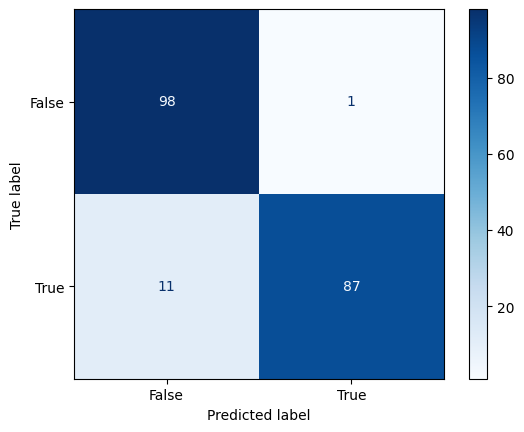

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

x_test_prediction = model.predict(x_test)

conf_matrix = confusion_matrix(y_test, x_test_prediction)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[False, True])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [40]:
from sklearn.metrics import classification_report

y_pred = model.predict(x_test)

print("Classification Report on Testing Data:")
print(classification_report(y_test, y_pred))

Classification Report on Testing Data:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94        99
           1       0.99      0.89      0.94        98

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197



#Random Forest

Random Forest Fit the model in RandomForest classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [42]:
y_pred = rfc.predict(x_test)

In [43]:
from sklearn import metrics

print("Evaluation Metrics (Random Forest):")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Evaluation Metrics (Random Forest):
Accuracy: 0.9187817258883249
Precision: 0.9659090909090909
Recall: 0.8673469387755102
F1 Score: 0.9139784946236559


Confusion Matrics

Confusion Matrix (Random Forest):


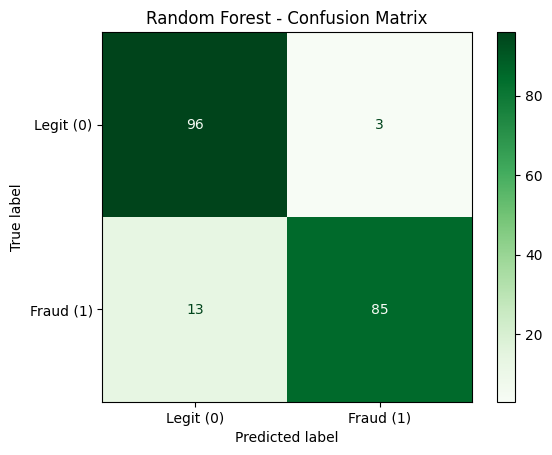

In [44]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
print("Confusion Matrix (Random Forest):")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Legit (0)", "Fraud (1)"])
disp.plot(cmap=plt.cm.Greens)
plt.title("Random Forest - Confusion Matrix")
plt.show()

Classification report

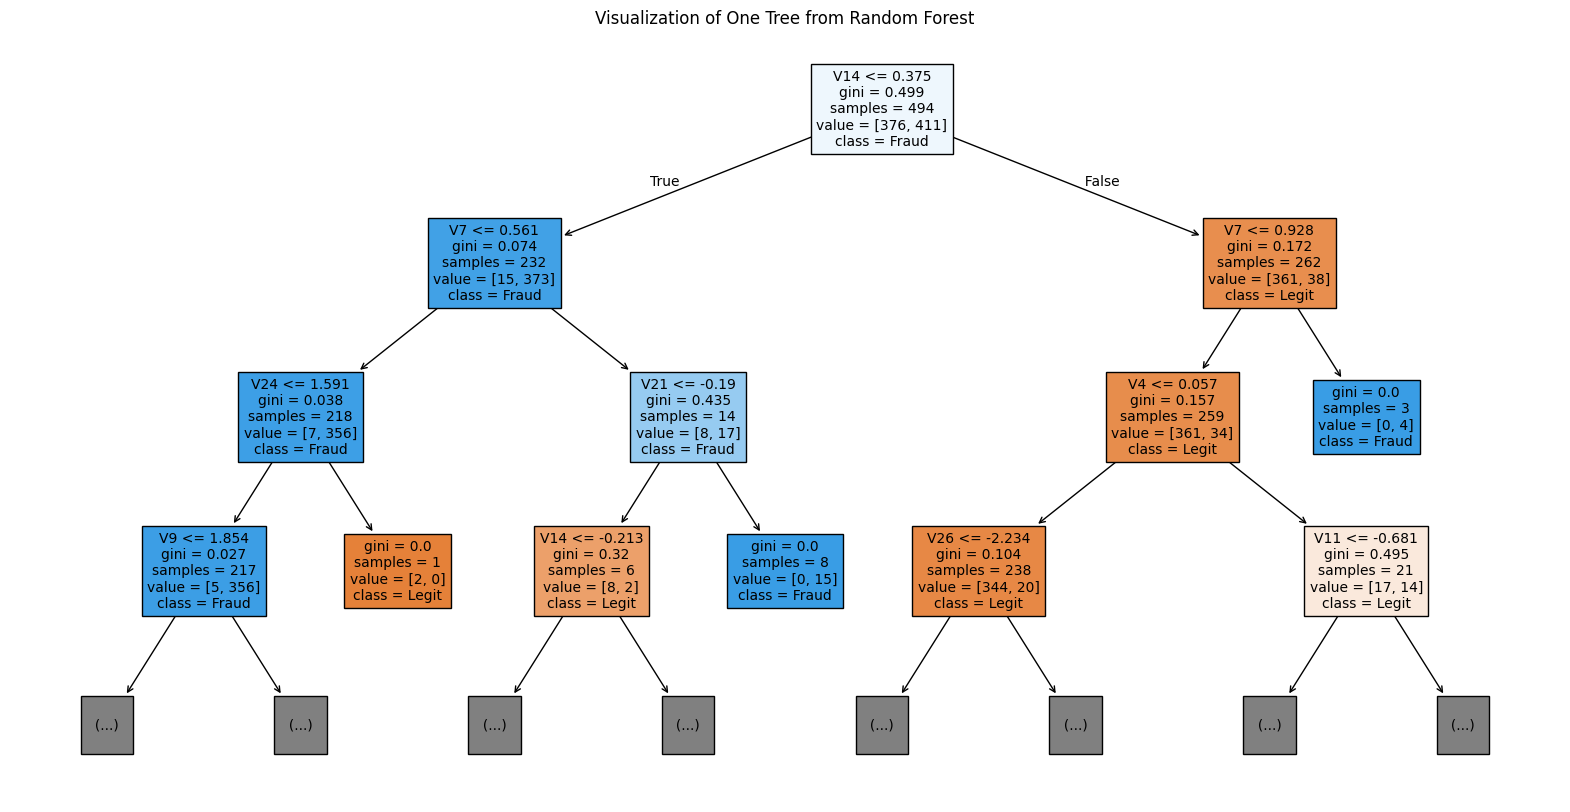

In [45]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize one tree from the Random Forest
plt.figure(figsize=(20, 10))
plot_tree(rfc.estimators_[0],
          feature_names=x.columns,
          class_names=["Legit", "Fraud"],
          filled=True,
          max_depth=3,  # Optional: limit depth for better readability
          fontsize=10)
plt.title("Visualization of One Tree from Random Forest")
plt.show()

#Naive Bayes Model

In [46]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()

Train the model on training set

In [47]:
nb_model.fit(x_train,y_train)

GaussianNB()

Make predictions on the testing

In [48]:
y_pred = nb_model.predict(x_test)

Evaluate model performance

In [49]:
from sklearn import metrics
print("Evaluation Metrics (Naive Bayes):")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Evaluation Metrics (Naive Bayes):
Accuracy: 0.8883248730964467
Precision: 0.9318181818181818
Recall: 0.8367346938775511
F1 Score: 0.8817204301075269


Confusion matrix

Confusion Matrix (Naive Bayes):


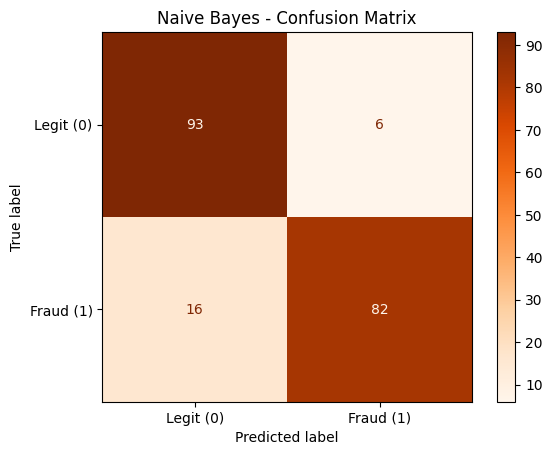

In [50]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
print("Confusion Matrix (Naive Bayes):")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Legit (0)", "Fraud (1)"])
disp.plot(cmap=plt.cm.Oranges)
plt.title("Naive Bayes - Confusion Matrix")
plt.show()

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        99
           1       0.93      0.84      0.88        98

    accuracy                           0.89       197
   macro avg       0.89      0.89      0.89       197
weighted avg       0.89      0.89      0.89       197



In [52]:
# Store all metrics for each model
models = ['Logistic Regression', 'Random Forest', 'Naive Bayes']

accuracy = [accuracy_score(y_test, model.predict(x_test)),
            accuracy_score(y_test, rfc.predict(x_test)),
            accuracy_score(y_test, nb_model.predict(x_test))]

precision = [precision_score(y_test, model.predict(x_test)),
             precision_score(y_test, rfc.predict(x_test)),
             precision_score(y_test, nb_model.predict(x_test))]

recall = [recall_score(y_test, model.predict(x_test)),
          recall_score(y_test, rfc.predict(x_test)),
          recall_score(y_test, nb_model.predict(x_test))]

f1 = [f1_score(y_test, model.predict(x_test)),
      f1_score(y_test, rfc.predict(x_test)),
      f1_score(y_test, nb_model.predict(x_test))]

In [54]:
# Real-life Transaction Prediction

import numpy as np

# Asking user to input transaction details
print("Enter the transaction details:")

time = float(input("Time (in seconds): "))
amount = float(input("Transaction Amount: "))

v_features = []
for i in range(1, 29):
    v = float(input(f"V{i}: "))
    v_features.append(v)

# Creating a numpy array of user input
input_data = [time] + v_features + [amount]
input_data = np.array(input_data).reshape(1, -1)

# Feature scaling (important!)
input_data_scaled = scaler.transform(input_data)

# Making prediction
prediction = model.predict(input_data_scaled)

# Showing result
if prediction[0] == 0:
    print("\n✅ The transaction is Legit.")
else:
    print("\n⚠ The transaction is Fraudulent!")

Enter the transaction details:
Time (in seconds): 2.0
Transaction Amount: 69.99
V1: -1.158233	
V2: 0.877737	
V3: 1.548718
V4: 0.403034
V5: -0.407193
V6: 0.095921
V7: 0.592941
V8: -0.270533
V9: 0.817739
V10: 0.753074431976354
V11: -0.822842877946363
V12: 0.53819555014995
V13: 1.3458515932154
V14: -1.11966983471731
V15: 0.175121130008994
V16: -0.451449182813529
V17: -0.237033239362776
V18:  -0.0381947870352842
V19:  0.803486924960175
V20: 0.408542360392758
V21: -0.00943069713232919
V22:  0.79827849458971
V23: -0.13745807961906
V24:  0.141266983824769
V25: -0.206009587619756
V26: 0.502292224181569
V27: 0.219422229513348
V28: 0.215153147499206

✅ The transaction is Legit.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
